<a href="https://colab.research.google.com/github/imtiazahmadtanvir/machine_learning/blob/main/K-means%20Clustering%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:

df = pd.read_csv('/content/pricerunner_aggregate.csv')
print(df.head())


   Product ID                                      Product Title  \
0           1                    apple iphone 8 plus 64gb silver   
1           2                apple iphone 8 plus 64 gb spacegrau   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...   
3           4                apple iphone 8 plus 64gb space grey   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...   

    Merchant ID   Cluster ID             Cluster Label   Category ID  \
0             1            1  Apple iPhone 8 Plus 64GB          2612   
1             2            1  Apple iPhone 8 Plus 64GB          2612   
2             3            1  Apple iPhone 8 Plus 64GB          2612   
3             4            1  Apple iPhone 8 Plus 64GB          2612   
4             5            1  Apple iPhone 8 Plus 64GB          2612   

   Category Label  
0   Mobile Phones  
1   Mobile Phones  
2   Mobile Phones  
3   Mobile Phones  
4   Mobile Phones  


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('/content/pricerunner_aggregate.csv')
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (35311, 7)


,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [ ]:

df_numeric = df.select_dtypes(include=[np.number])


df_numeric = df_numeric.dropna()


scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)

print(f"Processed dataset shape: {X.shape}")


Processed dataset shape: (35311, 4)


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv('/content/pricerunner_aggregate.csv')
print(f"Original dataset shape: {df.shape}")


df_numeric = df.select_dtypes(include=[np.number]).dropna()
print(f"Numeric-only dataset shape: {df_numeric.shape}")


scaler = StandardScaler()
X_real = scaler.fit_transform(df_numeric)

n_clusters_real = 3
random_state = 42

kmeans_real = KMeans(n_clusters=n_clusters_real, random_state=random_state, n_init='auto')
kmeans_real.fit(X_real)


labels_real = kmeans_real.labels_
centroids_real = kmeans_real.cluster_centers_
inertia_real = kmeans_real.inertia_

print(f"\nK-means (K={n_clusters_real}) completed.")
print(f"Inertia (Sum of Squared Distances): {inertia_real:.2f}")
print(f"Final Centroids:\n{centroids_real}")


Original dataset shape: (35311, 7)
Numeric-only dataset shape: (35311, 4)

K-means (K=3) completed.
Inertia (Sum of Squared Distances): 24295.40
Final Centroids:
[[ 0.51966775 -0.48341869  0.6725436   0.55529014]
 [ 0.6923732   1.51690276  0.71321663  0.68386899]
 [-1.21696526 -0.64410723 -1.42469048 -1.25438647]]


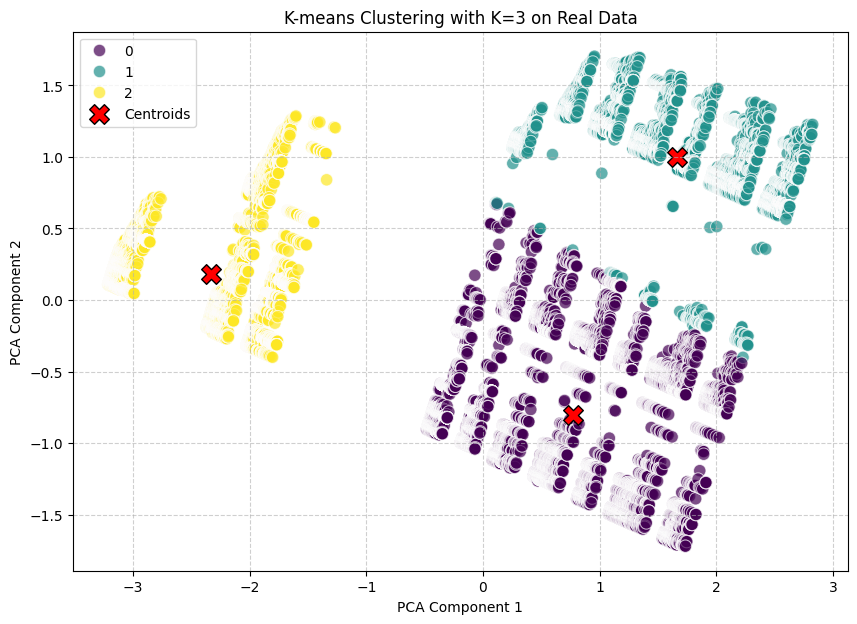

In [ ]:

pca = PCA(n_components=2)
X_real_pca = pca.fit_transform(X_real)
centroids_pca = pca.transform(centroids_real)


plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_real_pca[:, 0], y=X_real_pca[:, 1], hue=labels_real,
                palette='viridis', legend='full', s=80, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200,
            color='red', label='Centroids', edgecolor='black')
plt.title(f'K-means Clustering with K={n_clusters_real} on Real Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv('/content/pricerunner_aggregate.csv')


df_numeric = df.select_dtypes(include=[np.number]).dropna()
X_real = StandardScaler().fit_transform(df_numeric)


from tqdm import tqdm
k_range = range(2, 11)
inertias = []
silhouette_scores = []


for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_real)


    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_real, kmeans.labels_)
    silhouette_scores.append(score)

    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={score:.4f}")


 11%|█         | 1/9 [00:16<02:12, 16.58s/it]

K=2: Inertia=47376.69, Silhouette Score=0.6027


 22%|██▏       | 2/9 [00:32<01:52, 16.13s/it]

K=3: Inertia=24295.40, Silhouette Score=0.5816


 33%|███▎      | 3/9 [00:47<01:34, 15.72s/it]

K=4: Inertia=17701.52, Silhouette Score=0.5488


 44%|████▍     | 4/9 [01:02<01:17, 15.50s/it]

K=5: Inertia=15776.34, Silhouette Score=0.5258


 56%|█████▌    | 5/9 [01:18<01:02, 15.69s/it]

K=6: Inertia=12004.27, Silhouette Score=0.5148


 67%|██████▋   | 6/9 [01:33<00:46, 15.44s/it]

K=7: Inertia=7209.95, Silhouette Score=0.5627


 78%|███████▊  | 7/9 [01:48<00:30, 15.24s/it]

K=8: Inertia=6056.44, Silhouette Score=0.5650


 89%|████████▉ | 8/9 [02:03<00:15, 15.12s/it]

K=9: Inertia=5129.42, Silhouette Score=0.5663


100%|██████████| 9/9 [02:18<00:00, 15.35s/it]

K=10: Inertia=4084.53, Silhouette Score=0.5862


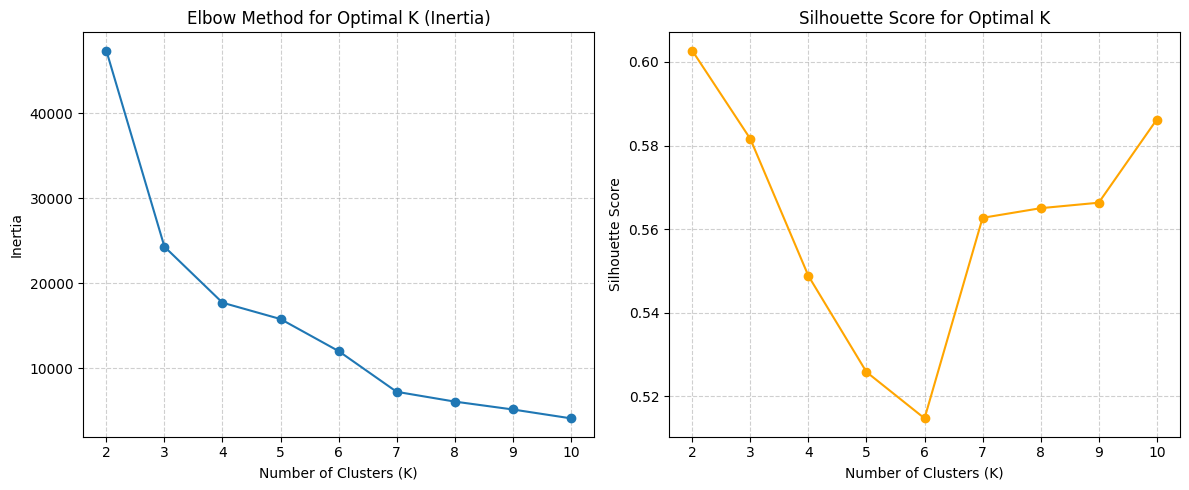

In [ ]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K (Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.6)


plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='orange')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd


df = pd.read_csv('/content/pricerunner_aggregate.csv')


print(df.head())


   Product ID                                      Product Title  \
0           1                    apple iphone 8 plus 64gb silver   
1           2                apple iphone 8 plus 64 gb spacegrau   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...   
3           4                apple iphone 8 plus 64gb space grey   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...   

    Merchant ID   Cluster ID             Cluster Label   Category ID  \
0             1            1  Apple iPhone 8 Plus 64GB          2612   
1             2            1  Apple iPhone 8 Plus 64GB          2612   
2             3            1  Apple iPhone 8 Plus 64GB          2612   
3             4            1  Apple iPhone 8 Plus 64GB          2612   
4             5            1  Apple iPhone 8 Plus 64GB          2612   

   Category Label  
0   Mobile Phones  
1   Mobile Phones  
2   Mobile Phones  
3   Mobile Phones  
4   Mobile Phones  


In [ ]:

import pandas as pd
df = pd.read_csv('/content/pricerunner_aggregate.csv')


df_numeric = df.select_dtypes(include=[float, int])


df_cleaned = df_numeric.dropna()


print("Shape of df_cleaned:", df_cleaned.shape)
print(df_cleaned.head())


Shape of df_cleaned: (35311, 4)
   Product ID   Merchant ID   Cluster ID   Category ID
0           1             1            1          2612
1           2             2            1          2612
2           3             3            1          2612
3           4             4            1          2612
4           5             5            1          2612


In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_real = scaler.fit_transform(df_cleaned)


print("X_real shape:", X_real.shape)


X_real shape: (35311, 4)


In [ ]:
from sklearn.metrics import silhouette_score


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_real)


score = silhouette_score(X_real, kmeans.labels_)
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.5816


In [ ]:
random_state = 42
n_clusters = 3

print("\n--- Comparing Initialization Methods for Real Data (K=3) ---")


print("\nK-means with 'k-means++' initialization:")
kmeans_pp = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=random_state)
kmeans_pp.fit(X_real)
labels_pp = kmeans_pp.labels_
print(f"  Inertia (k-means++): {kmeans_pp.inertia_:.2f}")
print(f"  Silhouette Score (k-means++): {silhouette_score(X_real, labels_pp):.4f}")



--- Comparing Initialization Methods for Real Data (K=3) ---

K-means with 'k-means++' initialization:
  Inertia (k-means++): 24295.40
  Silhouette Score (k-means++): 0.5816


In [ ]:
print("\nK-means with 'random' initialization (multiple runs):")
random_inits_labels = []
random_inits_inertia = []
random_inits_silhouette = []

for i in range(3):
    kmeans_rand = KMeans(n_clusters=n_clusters, init='random', n_init=1, random_state=random_state + i)
    kmeans_rand.fit(X_real)

    random_inits_labels.append(kmeans_rand.labels_)
    random_inits_inertia.append(kmeans_rand.inertia_)
    random_inits_silhouette.append(silhouette_score(X_real, kmeans_rand.labels_))

    print(f"  Run {i+1} (random): Inertia={random_inits_inertia[-1]:.2f}, Silhouette={random_inits_silhouette[-1]:.4f}")



K-means with 'random' initialization (multiple runs):
  Run 1 (random): Inertia=24295.42, Silhouette=0.5816
  Run 2 (random): Inertia=43604.62, Silhouette=0.5252
  Run 3 (random): Inertia=24295.40, Silhouette=0.5816


In [ ]:
from sklearn.decomposition import PCA


In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_real)

print("Shape after PCA:", X_pca.shape)


Shape after PCA: (35311, 2)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns


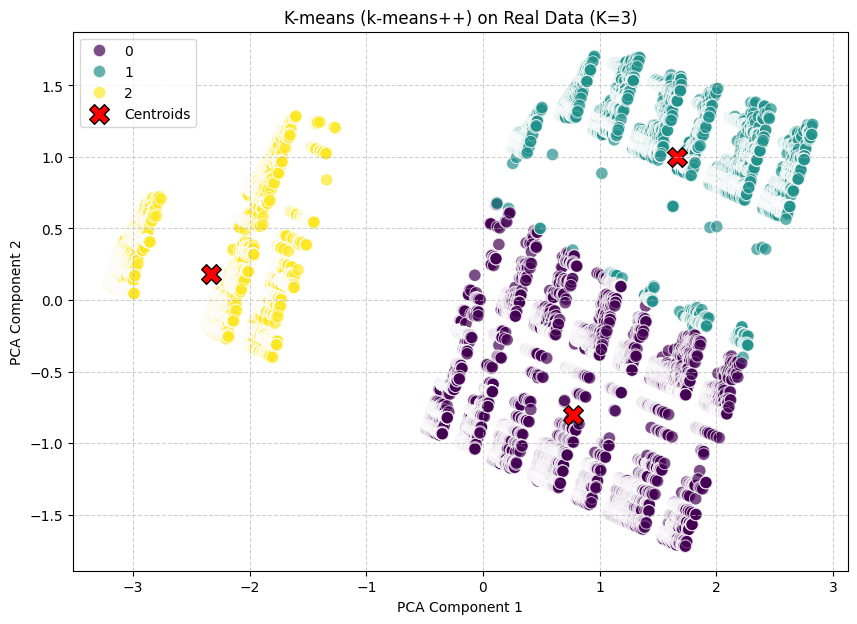

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_real)
centroids_pp_pca = pca.transform(kmeans_pp.cluster_centers_)


plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_pp, palette='viridis', s=80, alpha=0.7)
plt.scatter(centroids_pp_pca[:, 0], centroids_pp_pca[:, 1], marker='X', s=200, color='red', edgecolor='black', label='Centroids')
plt.title(f"K-means (k-means++) on Real Data (K={n_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


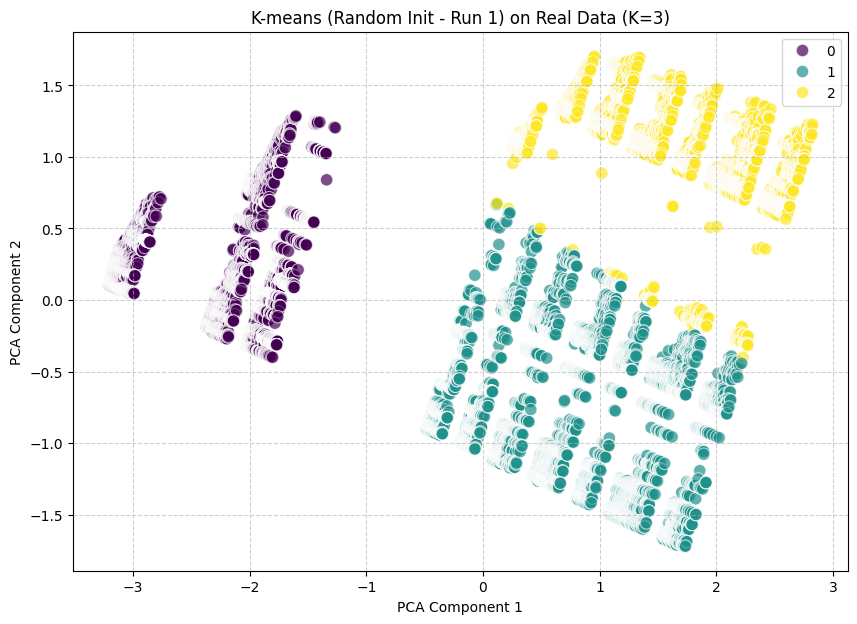

In [ ]:

labels_rand1 = random_inits_labels[0]

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_rand1, palette='viridis', s=80, alpha=0.7)
plt.title(f"K-means (Random Init - Run 1) on Real Data (K={n_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
